<a href="https://colab.research.google.com/github/Rajnishphe/PH421--Computational-Chemistry/blob/main/2_Molecular_Descriptors_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we will explore the calculation of some basic molecular descriptors using rdkit.


In [17]:
#Install the required packages.
!pip install rdkit
!pip install  seaborn mols2grid requests

In [19]:
#import the required modules.
import pandas as pd
import numpy as np
import mols2grid
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import DataStructs
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

In [9]:
#Download a file containing chemical structures in SMILES format.
url = "https://raw.githubusercontent.com/Rajnishphe/AIDD-2022/main/ML%20Based%20QSAR/new_1.csv"
df = pd.read_csv(url)

In [11]:
# Display the first few rows to understand the structure
print(df.head())

# Assuming the SMILES strings are in a column named 'SMILES'
smiles_column = 'SMILES'  # Change this to the actual column name if different



                Ambit_InchiKey  score activity                     SMILES  \
0  PFNFFQXMRSDOHW-UHFFFAOYNA-N      1   Active           N(CCCCNCCCN)CCCN   
1  HOTSFPXUILMJMT-UHFFFAOYNA-N      1   Active       OC(CNC=1C=CC=CC1)COC   
2  IEUAZNHOIZPQER-UHFFFAOYNA-N      1   Active    O1C2(NC(C1)(CO)CO)CCCC2   
3  NZPYFPLXCCGDDX-UHFFFAOYNA-N      1   Active  ClC=1C(C=2C=CN=CC2)=CSC1N   
4  XMYZXGRJFKLGLI-UHFFFAOYNA-N      1   Active       O=C(N1CC(CCC1)C)CCCC   

                                           Molecule  
0  <rdkit.Chem.rdchem.Mol object at 0x7d092d1cf370>  
1  <rdkit.Chem.rdchem.Mol object at 0x7d092d1cf920>  
2  <rdkit.Chem.rdchem.Mol object at 0x7d092d1cf990>  
3  <rdkit.Chem.rdchem.Mol object at 0x7d092d1cfa00>  
4  <rdkit.Chem.rdchem.Mol object at 0x7d092d1cfa70>  


In [12]:
# Convert SMILES strings to RDKit Molecules
df['Molecule'] = df[smiles_column].apply(lambda x: Chem.MolFromSmiles(x))

# Display the first few RDKit Molecules
print(df['Molecule'].head())



0    <rdkit.Chem.rdchem.Mol object at 0x7d092b940c10>
1    <rdkit.Chem.rdchem.Mol object at 0x7d092b940d60>
2    <rdkit.Chem.rdchem.Mol object at 0x7d092b9411c0>
3    <rdkit.Chem.rdchem.Mol object at 0x7d092b941230>
4    <rdkit.Chem.rdchem.Mol object at 0x7d092b940cf0>
Name: Molecule, dtype: object


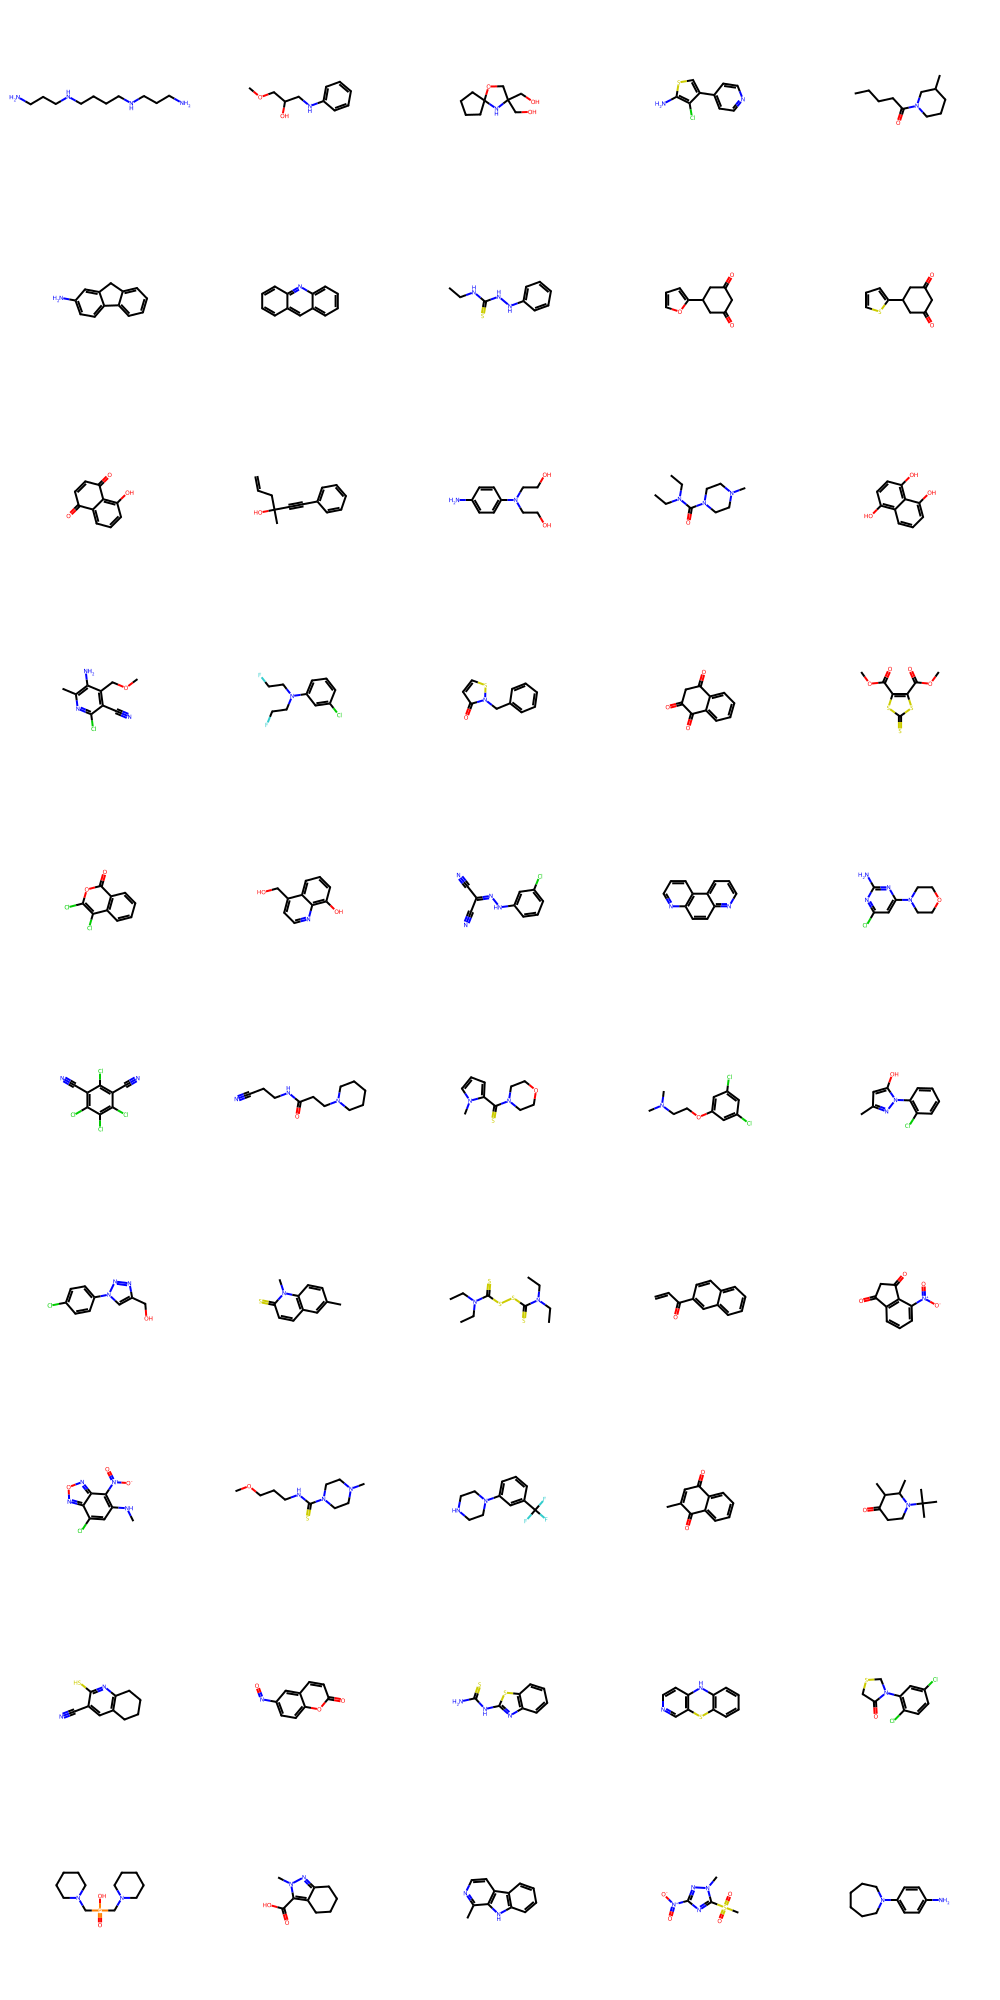

In [15]:
# Filter out invalid molecules (if any)
valid_molecules = df['Molecule'].notnull()
valid_df = df[valid_molecules]

# Get the list of valid RDKit Molecules
mols = valid_df['Molecule'].tolist()

# Draw molecules in a grid image
# Adjust molsPerRow to control the layout
img = Draw.MolsToGridImage(mols, molsPerRow=5, useSVG=True)

# Display the image
img

In [23]:
# Display molecules using mols2grid
mols2grid.display(valid_df, mol_col='Molecule')

MolGridWidget()

In [27]:
valid_df.head()

,Ambit_InchiKey,score,activity,SMILES,Molecule
0,PFNFFQXMRSDOHW-UHFFFAOYNA-N,1,Active,N(CCCCNCCCN)CCCN,<rdkit.Chem.rdchem.Mol object at 0x7d092b940c10>
1,HOTSFPXUILMJMT-UHFFFAOYNA-N,1,Active,OC(CNC=1C=CC=CC1)COC,<rdkit.Chem.rdchem.Mol object at 0x7d092b940d60>
2,IEUAZNHOIZPQER-UHFFFAOYNA-N,1,Active,O1C2(NC(C1)(CO)CO)CCCC2,<rdkit.Chem.rdchem.Mol object at 0x7d092b9411c0>
3,NZPYFPLXCCGDDX-UHFFFAOYNA-N,1,Active,ClC=1C(C=2C=CN=CC2)=CSC1N,<rdkit.Chem.rdchem.Mol object at 0x7d092b941230>
4,XMYZXGRJFKLGLI-UHFFFAOYNA-N,1,Active,O=C(N1CC(CCC1)C)CCCC,<rdkit.Chem.rdchem.Mol object at 0x7d092b940cf0>


In [32]:
from rdkit.Chem import Descriptors
# Calculate molecular descriptors
def calculate_descriptors(mol):
    """Calculate a set of molecular descriptors for a given molecule."""
    if mol is None:
        return pd.Series([None] * 6, index=['MW', 'LogP', 'HBD', 'HBA', 'TPSA', 'RotatableBonds'])

    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    tpsa = Descriptors.TPSA(mol)
    rotatable_bonds = Descriptors.NumRotatableBonds(mol)

    return pd.Series([mw, logp, hbd, hba, tpsa, rotatable_bonds],
                     index=['MW', 'LogP', 'HBD', 'HBA', 'TPSA', 'RotatableBonds'])

# Apply the descriptor calculation to each molecule
valid_df[['MW', 'LogP', 'HBD', 'HBA', 'TPSA', 'RotatableBonds']] = valid_df['Molecule'].apply(calculate_descriptors)

In [33]:
valid_df.head()


,Ambit_InchiKey,score,activity,SMILES,Molecule,MW,LogP,HBD,HBA,TPSA,RotatableBonds
0,PFNFFQXMRSDOHW-UHFFFAOYNA-N,1,Active,N(CCCCNCCCN)CCCN,<rdkit.Chem.rdchem.Mol object at 0x7d092b940c10>,202.346,-0.3566,4.0,4.0,76.10,11.0
1,HOTSFPXUILMJMT-UHFFFAOYNA-N,1,Active,OC(CNC=1C=CC=CC1)COC,<rdkit.Chem.rdchem.Mol object at 0x7d092b940d60>,181.235,1.1058,2.0,3.0,41.49,5.0
2,IEUAZNHOIZPQER-UHFFFAOYNA-N,1,Active,O1C2(NC(C1)(CO)CO)CCCC2,<rdkit.Chem.rdchem.Mol object at 0x7d092b9411c0>,187.239,-0.4001,3.0,4.0,61.72,2.0
3,NZPYFPLXCCGDDX-UHFFFAOYNA-N,1,Active,ClC=1C(C=2C=CN=CC2)=CSC1N,<rdkit.Chem.rdchem.Mol object at 0x7d092b941230>,210.689,3.0457,1.0,3.0,38.91,1.0
4,XMYZXGRJFKLGLI-UHFFFAOYNA-N,1,Active,O=C(N1CC(CCC1)C)CCCC,<rdkit.Chem.rdchem.Mol object at 0x7d092b940cf0>,183.295,2.4351,0.0,1.0,20.31,3.0


In [34]:
pip install seaborn matplotlib pandas

In [36]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import mols2grid
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
import pandas as pd

# Calculate mean and standard deviation for each descriptor
descriptor_columns = ['MW', 'LogP', 'HBD', 'HBA', 'TPSA', 'RotatableBonds']
mean_values = valid_df[descriptor_columns].mean()
std_values = valid_df[descriptor_columns].std()

# Create a DataFrame for plotting
descriptor_summary = pd.DataFrame({
    'Descriptor': descriptor_columns,
    'Mean': mean_values,
    'StdDev': std_values
})

print(descriptor_summary)


                    Descriptor        Mean     StdDev
MW                          MW  201.670358  26.723723
LogP                      LogP    1.921348   1.072583
HBD                        HBD    0.811321   0.981690
HBA                        HBA    2.962264   1.358198
TPSA                      TPSA   41.995849  23.297738
RotatableBonds  RotatableBonds    1.735849   1.982141


<ipython-input-44-54837b1e2347>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='Descriptor', y='Mean', data=descriptor_summary, ci=None, palette='muted')
<ipython-input-44-54837b1e2347>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Descriptor', y='Mean', data=descriptor_summary, ci=None, palette='muted')


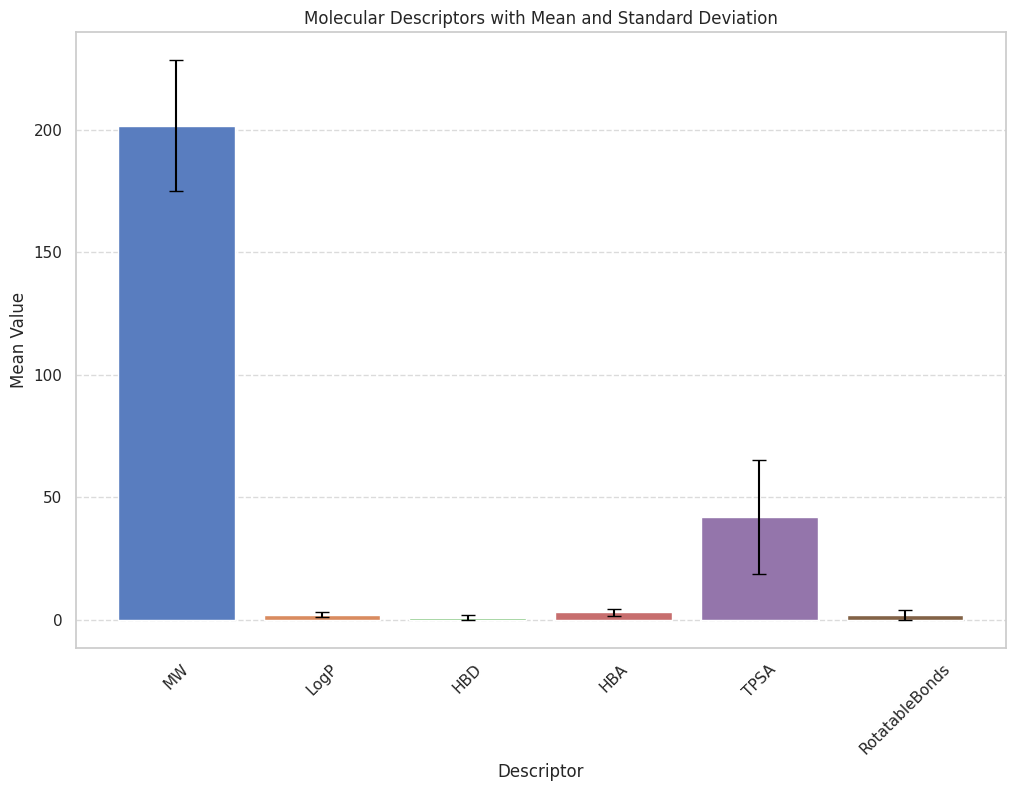

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot with error bars using Seaborn and manual error bars
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Descriptor', y='Mean', data=descriptor_summary, ci=None, palette='muted')

# Add error bars manually
for index, row in descriptor_summary.iterrows():
    barplot.errorbar(x=index, y=row['Mean'], yerr=row['StdDev'], fmt='none', color='black', capsize=5)

plt.title('Molecular Descriptors with Mean and Standard Deviation')
plt.xlabel('Descriptor')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Excercise**
Using the same method, calculte descriptors by utilisig other tools and algorithms such as the  following:
1. RDKit (~60+ descriptors and fingerprints)
2. Open Babel: ~30-40 descriptors.
3. ChemPy: Basic properties.
4. Mordred: 1800 descriptors.
5. PaDEL-Descriptor: ~200+ descriptors.